# ATIVIDADE 4.2 - Busca de todas as raízes de uma equação

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. MÉTODO DE REFINAMENTO (BISSEÇÃO CLÁSSICA)

Encontra UMA raiz no intervalo [a, b] onde já sabemos que há troca de sinal.

    def metodo_bissecao(f, a, b, tol=1e-7, max_iter=100):

        if np.sign(f(a)) * np.sign(f(b)) >= 0:

Segurança extra

            return None 

        x_atual = a
        for i in range(max_iter):
            x_atual = a + 0.5 * (b - a)
            fx = f(x_atual)
            
            if abs(fx) < 1e-15 or (b - a) < tol: # Critério de parada misto
                return x_atual
            
            if np.sign(f(a)) * np.sign(fx) < 0:
                b = x_atual
            else:
                a = x_atual
                
        return x_atual

*2. MÉTODO GLOBAL (BUSCA INCREMENTAL + BISSEÇÃO)*

Percorre o intervalo global dividindo-o em 'num_divisoes' e aplica a bisseção onde detecta troca de sinal.
    
Args:

- f: Função objetivo

- x_inicio, x_fim: Intervalo global de busca

- num_divisoes: Resolução da varredura (quanto maior, mais chance de achar raízes próximas)

- tol: Tolerância para o refinamento da raiz


def encontrar_todas_raizes(f, x_inicio, x_fim, num_divisoes=1000, tol=1e-6):
    
    raizes = []
    
Cria uma malha de pontos (Mesh)

    x_grid = np.linspace(x_inicio, x_fim, num_divisoes)
    
Avalia a função na malha

    y_grid = f(x_grid)
    
    print(f"Varrendo intervalo [{x_inicio}, {x_fim}] com {num_divisoes} subintervalos...")
    
Varredura Incremental

    for i in range(len(x_grid) - 1):
        xa = x_grid[i]
        xb = x_grid[i+1]
        ya = y_grid[i]
        yb = y_grid[i+1]
        
1. Checa troca de sinal (Teorema do Valor Intermediário) 

        if np.sign(ya) * np.sign(yb) < 0:
            raiz = metodo_bissecao(f, xa, xb, tol)
            if raiz is not None:
                raizes.append(raiz)
        
2. Checa se o ponto em si é raiz (para casos de raízes inteiras na grade)

        elif ya == 0:
            raizes.append(xa)
            
Remove duplicatas que podem ocorrer em bordas e ordena

    raizes_unicas = sorted(list(set(np.round(raizes, decimals=8))))
    
    return raizes_unicas


*3. CASOS DE TESTE*

Teste 1: Função Trigonométrica (Várias raízes periódicas)

    print("\n" + "="*50)
    print("TESTE 1: f(x) = cos(x) * (x - 2)")
    print("="*50)
    def f1(x): return np.cos(x) * (x - 2)

Intervalo [0, 10] deve ter raízes em pi/2, 3pi/2, 5pi/2 e x=2

    raizes_f1 = encontrar_todas_raizes(f1, 0, 10, num_divisoes=100)
    print(f"Raízes encontradas: {raizes_f1}")
    print(f"Esperadas aprox: [1.5708, 2.0, 4.7124, 7.8540]")


Teste 2: Polinômio do Artigo (Eq. 5) - O "Caso Difícil"

O artigo menciona que métodos estáticos falham aqui se a malha for grossa porque x=0.5 e x=0.50001 estão muito próximos.

    print("\n" + "="*50)
    print("TESTE 2: Polinômio 'Difícil' do Artigo ")
    print("f(x) = (x-0.5)(x-0.50001)(x-4)(x-4.05)(x-9.3)")
    print("="*50)

    def f_artigo(x):
        return (x - 0.5) * (x - 0.50001) * (x - 4) * (x - 4.05) * (x - 9.3)

Tentativa 1: Malha grosseira (como na Fig 1 do artigo, pode falhar)

    print(">>> Tentativa com Malha Grossa (N=1000)")
    raizes_artigo_grossa = encontrar_todas_raizes(f_artigo, 0, 10, num_divisoes=1000)
    print(f"Raízes (Grossa): {raizes_artigo_grossa}")
    print("Nota: Provavelmente aglutinou 0.5 e 0.50001 numa só.")

Tentativa 2: Malha fina (Simulando o refinamento adaptativo manualmente)
    
    print("\n>>> Tentativa com Malha Fina (N=200000)")
    
Precisamos de muitos pontos para separar 0.00001 de distância sem a lógica adaptativa complexa
    
    raizes_artigo_fina = encontrar_todas_raizes(f_artigo, 0, 10, num_divisoes=200000) 
    print(f"Raízes (Fina):   {raizes_artigo_fina}")
    print("Raízes exatas: [0.5, 0.50001, 4.0, 4.05, 9.3]")

*4. VISUALIZAÇÃO GRÁFICA DO TESTE 2*

    x_plot = np.linspace(0, 10, 1000)
    y_plot = f_artigo(x_plot)
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label='Polinômio Eq. 5')
    plt.scatter(raizes_artigo_fina, [0]*len(raizes_artigo_fina), color='red', zorder=5, label='Raízes Detectadas')
    plt.axhline(0, color='black', linewidth=1)
    plt.title('Visualização das Raízes Encontradas (Teste 2)')
    plt.ylim(-10, 10) # Zoom vertical para ver os cruzamentos
    plt.legend()
    plt.grid(True)

plt.show()


TESTE 1: f(x) = cos(x) * (x - 2)
Varrendo intervalo [0, 10] com 100 subintervalos...
Raízes encontradas: [np.float64(1.57079639), np.float64(1.99999992), np.float64(4.71238917), np.float64(7.85398194)]
Esperadas aprox: [1.5708, 2.0, 4.7124, 7.8540]

TESTE 2: Polinômio 'Difícil' do Artigo 
f(x) = (x-0.5)(x-0.50001)(x-4)(x-4.05)(x-9.3)
>>> Tentativa com Malha Grossa (N=1000)
Varrendo intervalo [0, 10] com 1000 subintervalos...
Raízes (Grossa): [np.float64(4.00000006), np.float64(4.05000001), np.float64(9.29999977)]
Nota: Provavelmente aglutinou 0.5 e 0.50001 numa só.

>>> Tentativa com Malha Fina (N=200000)
Varrendo intervalo [0, 10] com 200000 subintervalos...
Raízes (Fina):   [np.float64(0.49999977), np.float64(0.50000992), np.float64(4.00000008), np.float64(4.05000033), np.float64(9.30000002)]
Raízes exatas: [0.5, 0.50001, 4.0, 4.05, 9.3]


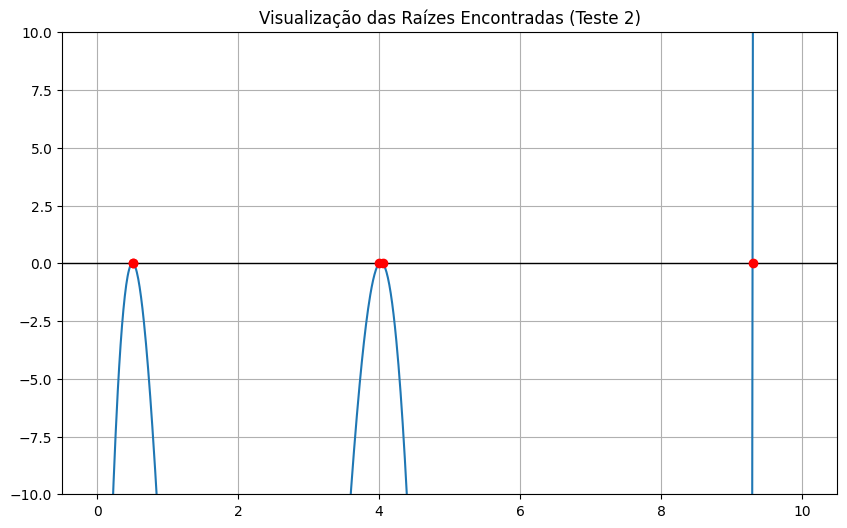

In [3]:
def metodo_bissecao(f, a, b, tol=1e-7, max_iter=100):

    if np.sign(f(a)) * np.sign(f(b)) >= 0:
        return None

    x_atual = a
    for i in range(max_iter):
        x_atual = a + 0.5 * (b - a)
        fx = f(x_atual)
        
        if abs(fx) < 1e-15 or (b - a) < tol:
            return x_atual
        
        if np.sign(f(a)) * np.sign(fx) < 0:
            b = x_atual
        else:
            a = x_atual
            
    return x_atual

def encontrar_todas_raizes(f, x_inicio, x_fim, num_divisoes=1000, tol=1e-6):

    raizes = []
    
    x_grid = np.linspace(x_inicio, x_fim, num_divisoes)
    
    y_grid = f(x_grid)
    
    print(f"Varrendo intervalo [{x_inicio}, {x_fim}] com {num_divisoes} subintervalos...")
    
    for i in range(len(x_grid) - 1):
        xa = x_grid[i]
        xb = x_grid[i+1]
        ya = y_grid[i]
        yb = y_grid[i+1]
        
        if np.sign(ya) * np.sign(yb) < 0:
            raiz = metodo_bissecao(f, xa, xb, tol)
            if raiz is not None:
                raizes.append(raiz)
        
        elif ya == 0:
            raizes.append(xa)
            
    raizes_unicas = sorted(list(set(np.round(raizes, decimals=8))))
    
    return raizes_unicas

print("\n" + "="*50)
print("TESTE 1: f(x) = cos(x) * (x - 2)")
print("="*50)
def f1(x): return np.cos(x) * (x - 2)

raizes_f1 = encontrar_todas_raizes(f1, 0, 10, num_divisoes=100)
print(f"Raízes encontradas: {raizes_f1}")
print(f"Esperadas aprox: [1.5708, 2.0, 4.7124, 7.8540]")


print("\n" + "="*50)
print("TESTE 2: Polinômio 'Difícil' do Artigo ")
print("f(x) = (x-0.5)(x-0.50001)(x-4)(x-4.05)(x-9.3)")
print("="*50)

def f_artigo(x):
    return (x - 0.5) * (x - 0.50001) * (x - 4) * (x - 4.05) * (x - 9.3)

print(">>> Tentativa com Malha Grossa (N=1000)")
raizes_artigo_grossa = encontrar_todas_raizes(f_artigo, 0, 10, num_divisoes=1000)
print(f"Raízes (Grossa): {raizes_artigo_grossa}")
print("Nota: Provavelmente aglutinou 0.5 e 0.50001 numa só.")

print("\n>>> Tentativa com Malha Fina (N=200000)")

raizes_artigo_fina = encontrar_todas_raizes(f_artigo, 0, 10, num_divisoes=200000) 
print(f"Raízes (Fina):   {raizes_artigo_fina}")
print("Raízes exatas: [0.5, 0.50001, 4.0, 4.05, 9.3]")

x_plot = np.linspace(0, 10, 1000)
y_plot = f_artigo(x_plot)
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Polinômio Eq. 5')
plt.scatter(raizes_artigo_fina, [0]*len(raizes_artigo_fina), color='red', zorder=5, label='Raízes Detectadas')
plt.axhline(0, color='black', linewidth=1)
plt.title('Visualização das Raízes Encontradas (Teste 2)')
plt.ylim(-10, 10)
plt.grid(True)